We will evaluate the performance and predictive power of a model that has been trained and tested on homes in suburbs of Boston, Massachusetts. The model selected will be used to make predictions about a home and it's monetary value.
This data was obtainedfrom the UCI Machine Learning Repository. This data was collected in 1978 with 14 features for homes from various suburbs in Boston, Massachusetts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file
from pathlib import Path
import requests
import numpy as np
import pandas as pd
import pandas_profiling

ModuleNotFoundError: No module named 'library'

In [5]:
from sklearn.datasets import load_boston
import pandas as pd
boston= load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
#Looking at the data shape
boston.data.shape

(506, 13)

In [7]:
#Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
feature_names=['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

In [9]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# convert Boston data into a dataframe

In [10]:
bosdf= pd.DataFrame(boston.data)
bosdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
bosdf.columns = boston.feature_names
bosdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#Median Value(MEDV) attribute 14 the target is not included in this table. Its stored in target data
print(boston.target.shape)

(506,)


In [13]:
bosdf['MEDV'] = boston.target
bosdf.head()
bosdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
#Calling the head method on ski_data to print the first several rows of the data, 
#we will transpose the output using .T; where T stands for transpose
bosdf.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


In [15]:
#lets call the  describe() to look at the basic summary statistics for all variable/columns.
bosdf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
# Using the .isnull metho to find null values.
bosdf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Using isnull we were able to show that there are no null values in the data

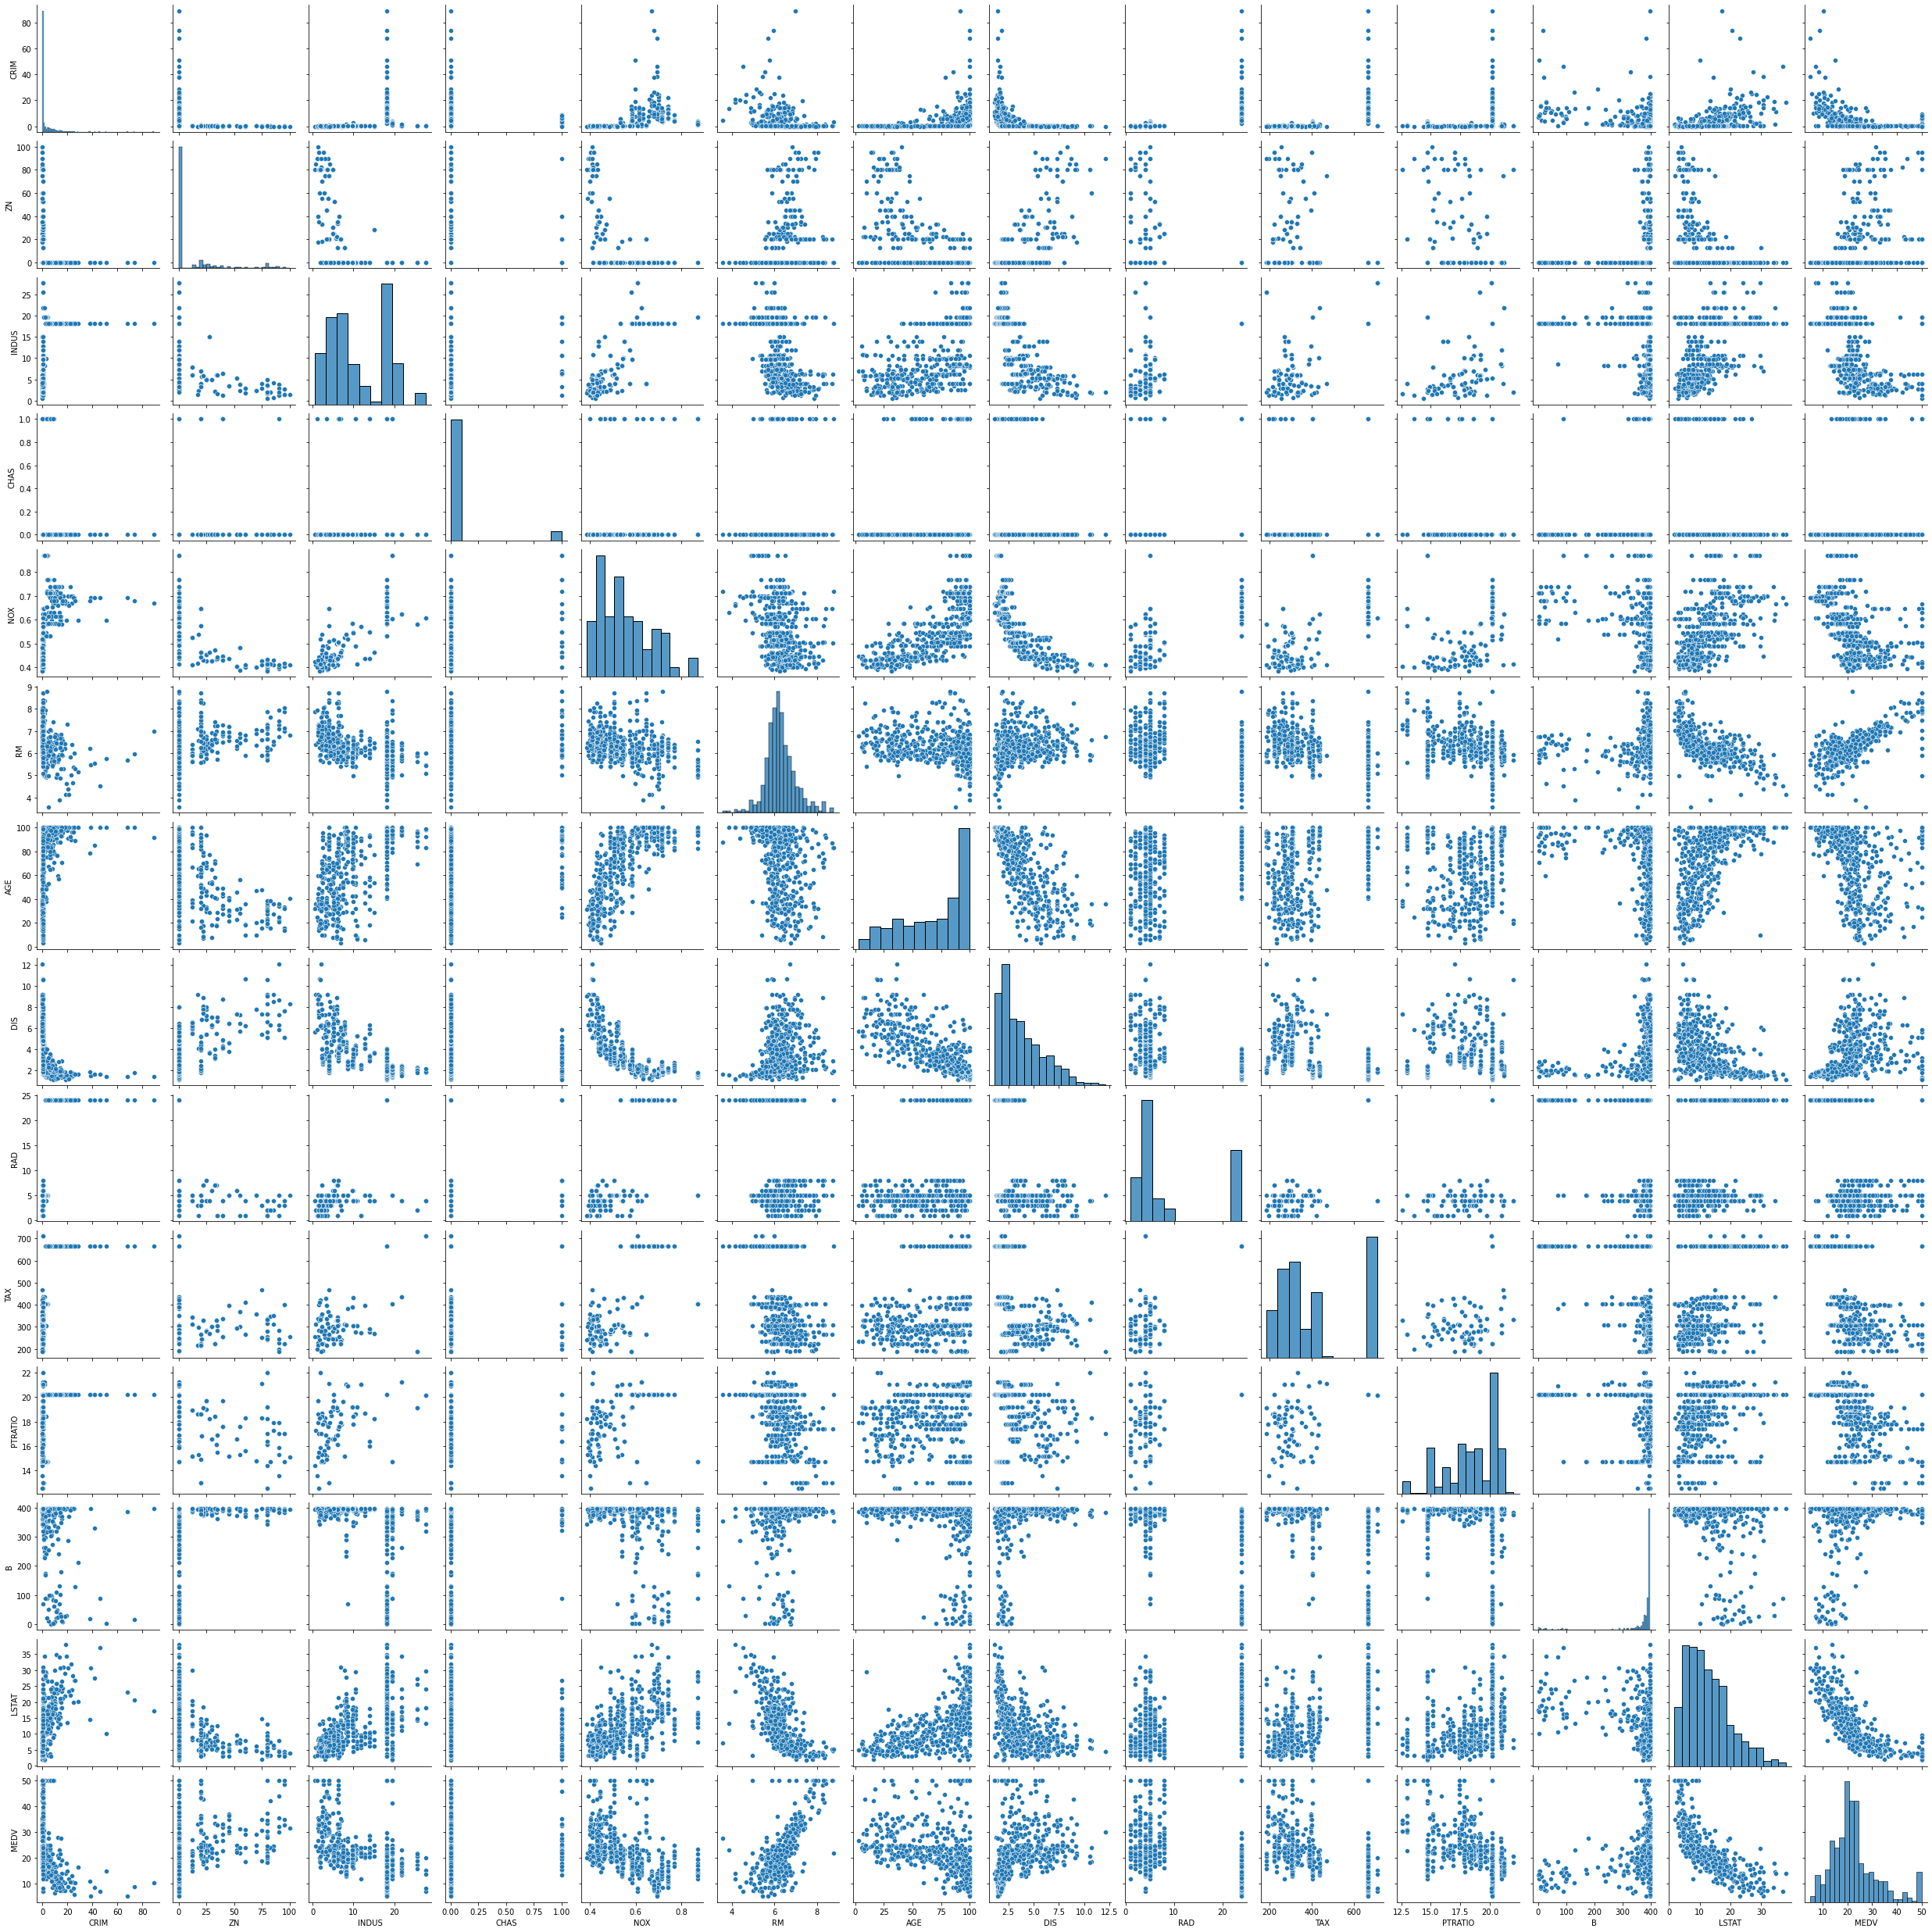

In [17]:
#Let's look at the correlation matrix to infer the relationship between every varaible in a grid plot using sns.pairplot() method
sns.pairplot(bosdf)

From the plots, it is obvious that CRIM and MEDV are negetively correlated though skewed towards the left.
Other parameters like RM and MEDV positively correlates and that makes sense.
MEDV and LSAT are negative pals.
It looks like as the proportion of minority population tincreases price of house depreciates
PTRATIO and MEDV show no real correlation

Text(0.5, 1.0, "Relationship between CRIM and Median value of owner-occupied homes in $1000's")

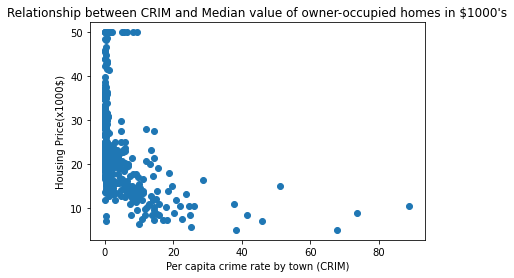

In [19]:
#Lets plot some of the interesting correlations.
plt.scatter(bosdf.CRIM, bosdf.MEDV)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price(x1000$)")
plt.title("Relationship between CRIM and Median value of owner-occupied homes in $1000's")

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

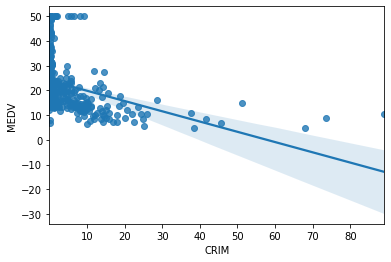

In [20]:
#Make the same plot wit
sns.regplot(y="MEDV", x="CRIM", data=bosdf, fit_reg = True)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

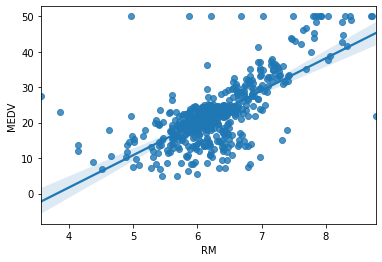

In [21]:
sns.regplot(y="MEDV", x="RM", data=bosdf, fit_reg = True)

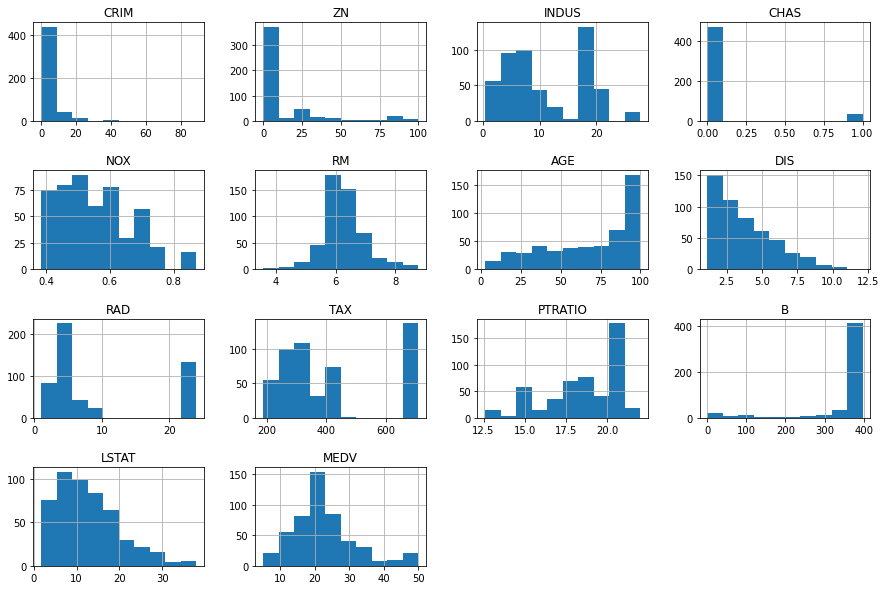

In [22]:
#plot histogram for all variables with plt.subplots_adjust()
bosdf.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Price seem evenly distributed

<AxesSubplot:>

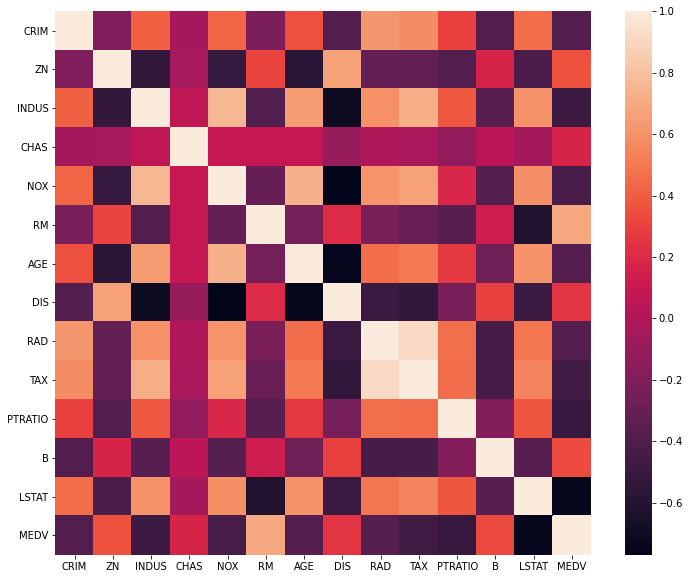

In [23]:
#Lets generate a heatmap showing the relation among features
plt.subplots(figsize=(12,10))
sns.heatmap(bosdf.corr())

TAX and RAD are highly correlated features. 
The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV 
These are good candidates for predictors. Let's plot these columns against MEDV

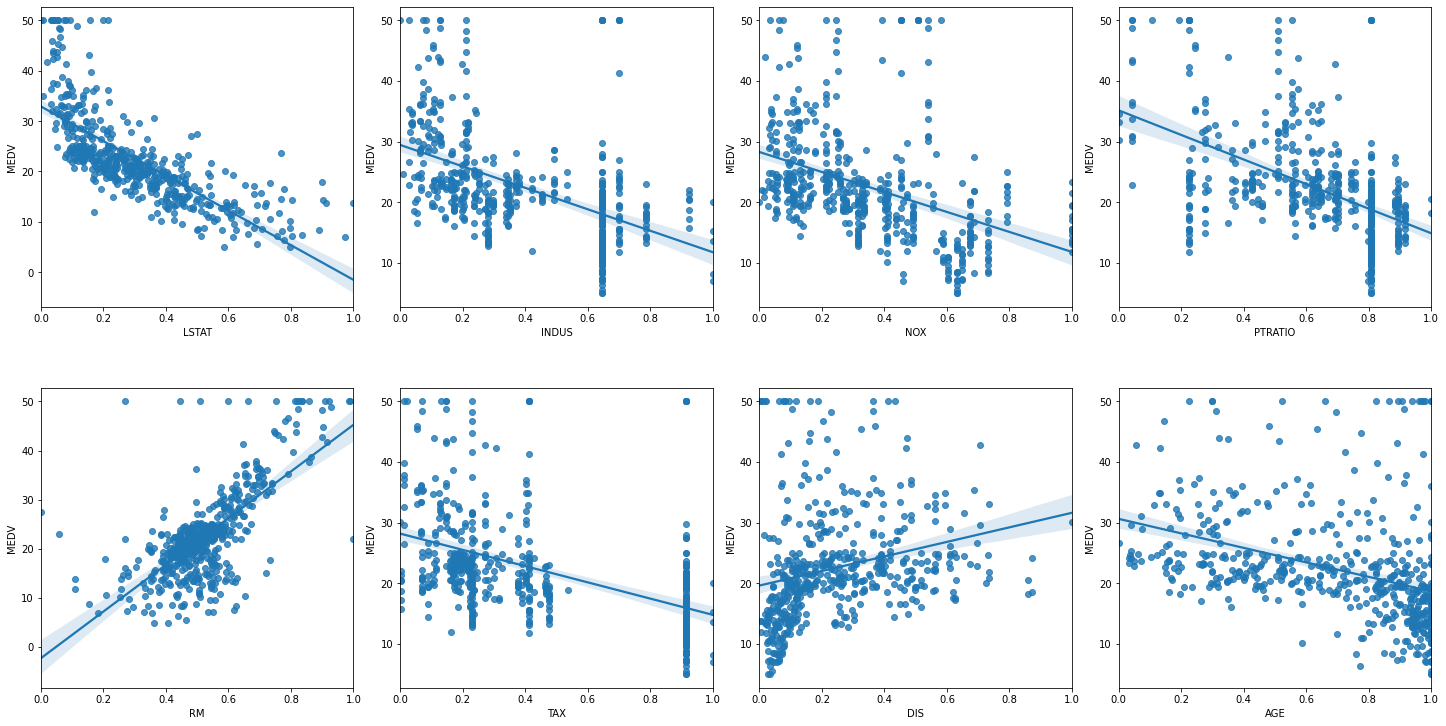

In [92]:
#Lets from sklearn import preprocessing
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = bosdf.loc[:,column_sels]
y = bosdf['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
#Let Prepare to build a model

In [24]:
#Get dummy variables for CHAS, the River catigorical data, where 1 is no presence and 0 means presence of the river
dummy_chas=pd.get_dummies(bosdf["CHAS"])
dummy_chas.head()

,0.0,1.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [28]:
#rename columns
dummy_chas.rename(columns = {1.0:'NO_RIVER',0.0:'CHARLES_RIVER'},
            inplace = True)

In [30]:
#checking the header for the dummy variables
dummy_chas.head()

,NO_RIVER,CHARLES_RIVER
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [31]:
#Merge the two tables, dummies and the boston data using pd.concat
bosdf1= pd.concat([bosdf,dummy_chas],axis=1)
bosdf1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NO_RIVER,CHARLES_RIVER
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [35]:
#rename columns
bosdf1.rename(columns = {'NO_River':'NORIVR', 'CHARLES_RIVER':'CHARLESRIVER'},
            inplace = True)

In [36]:
bosdf1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NO_RIVER,CHARLESRIVER
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [37]:
#Drop CHAS column after creating dummies. rename dataframe
bosdf2=bosdf1.drop('CHAS', axis=1)
bosdf2.head()
bosdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRIM          506 non-null    float64
 1   ZN            506 non-null    float64
 2   INDUS         506 non-null    float64
 3   NOX           506 non-null    float64
 4   RM            506 non-null    float64
 5   AGE           506 non-null    float64
 6   DIS           506 non-null    float64
 7   RAD           506 non-null    float64
 8   TAX           506 non-null    float64
 9   PTRATIO       506 non-null    float64
 10  B             506 non-null    float64
 11  LSTAT         506 non-null    float64
 12  MEDV          506 non-null    float64
 13  NO_RIVER      506 non-null    uint8  
 14  CHARLESRIVER  506 non-null    uint8  
dtypes: float64(13), uint8(2)
memory usage: 52.5 KB


In [42]:
#change  data types NORIVR and River to catigorical
bosdf2['NO_RIVER'] = bosdf2['NO_RIVER'].astype('category')
bosdf2['CHARLESRIVER'] = bosdf2['CHARLESRIVER'].astype('category')

In [43]:
#Lets check that the catigorical data is identify as such
bosdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CRIM          506 non-null    float64 
 1   ZN            506 non-null    float64 
 2   INDUS         506 non-null    float64 
 3   NOX           506 non-null    float64 
 4   RM            506 non-null    float64 
 5   AGE           506 non-null    float64 
 6   DIS           506 non-null    float64 
 7   RAD           506 non-null    float64 
 8   TAX           506 non-null    float64 
 9   PTRATIO       506 non-null    float64 
 10  B             506 non-null    float64 
 11  LSTAT         506 non-null    float64 
 12  MEDV          506 non-null    float64 
 13  NO_RIVER      506 non-null    category
 14  CHARLESRIVER  506 non-null    category
dtypes: category(2), float64(13)
memory usage: 52.7 KB


Yes! the dummies are all catigorical now

In [44]:
# Loading packages for modellig

In [45]:
#Load packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [46]:
#making MEDV the y variable by dropping it from the dataset
X = bosdf2.drop('MEDV', axis=1)
y = bosdf2['MEDV']

In [47]:
#Standardize the magnitude of numeric features using a scaler 
scaler = preprocessing.StandardScaler().fit(X)
X_scaled =scaler.transform(X)
#scaled_df = pd.DataFrame(scaled_df, columns=names)

In [48]:
#split data into test Arespectively
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3)

In [49]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

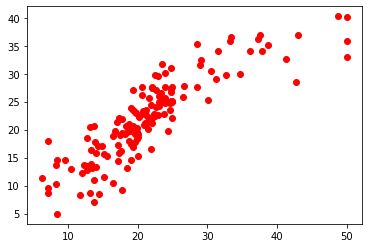

In [50]:
y_pred = reg.predict(x_test)
plt.scatter(y_test, y_pred, c = 'Red')

In [ ]:
#Checking predictive score MSE of the moel

In [51]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse)

Mean Square Error :  18.11445305024962


In [52]:
# Generate new dataframe to compare prediction with actual prices
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df2 = df1.head(10)

In [57]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 300 to 463
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     10 non-null     float64
 1   Predicted  10 non-null     float64
dtypes: float64(2)
memory usage: 240.0 bytes


,Actual,Predicted
300,24.8,30.962442
167,23.8,22.815347
170,17.4,22.133565
433,14.3,17.082469
154,17.0,21.279470


In [54]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared error', r2_score(y_test, y_pred))

MAE 3.110646621574116
MSE 18.11445305024962
RMSE 4.256107734802964
R squared error 0.7448746332834963


In [58]:
# Cross validation
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -34.71 (+/- 45.57)
MSE: -31.05 (+/- 37.10)


Text(0.5, 1.0, 'Scatter plot of predicted house prices using linear regresion model')

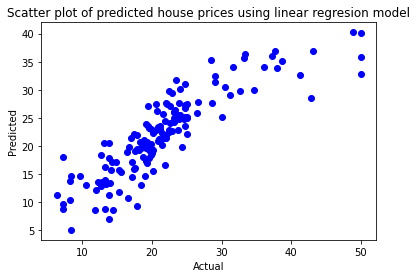

In [61]:
l_ridge.fit(x_train,y_train)
y_pred2 = l_ridge.predict(x_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred2})
df3 = df1.head(10)
df3
#plot figure to show prediction using plt
plt.scatter(y_test, y_pred2, c = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter plot of predicted house prices using linear regresion model")

In [62]:
#Let's try some non prametric regression techniques such as SVR with radial Basis Function(rbf) kernelization, DecisionTreeRegressor, KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [63]:
#Fit SVR model
#In contrast to OLS, the objective function of SVR is to minimize the, 
#the l2-norm(Euclidean distance) of the coefficient vector — not the squared error.
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [64]:
kf = KFold(n_splits=2)

In [65]:
#hyperparameter tuning using GridSearch
grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
grid_sv.fit(X_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)

Best classifier : SVR(C=10.0, gamma=0.01)


In [68]:
scores = cross_val_score(svr_rbf, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -48.84 (+/- 28.13)


Text(0.5, 1.0, 'Scatter plot of predicted house prices using SVR model')

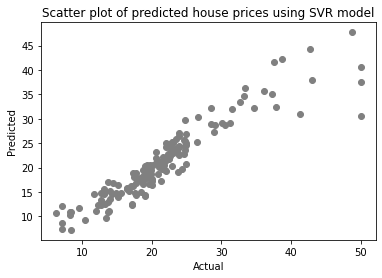

In [72]:
grid_sv.fit(x_train,y_train)
y_pred3 = grid_sv.predict(x_test)
df4 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred3})
df5 = df1.head(10)
df5
#Plot prediction with SVR model
plt.scatter(y_test, y_pred3, c = 'gray')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter plot of predicted house prices using SVR model")

In [86]:
#Using gradient boosting 
from sklearn.ensemble import GradientBoostingRegressor
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=learning_rate, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_sv.fit(X_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Best classifier : GradientBoostingRegressor(max_depth=6, min_samples_leaf=9, random_state=30)
MSE: -30.90 (+/- 8.55)


In [87]:
#KNN model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
#hyperparameters
grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Best classifier : KNeighborsRegressor(n_neighbors=3)
KNN Accuracy: -35.62 (+/- 2.38)


KNN Accuracy: -32.16 (+/- 7.50)


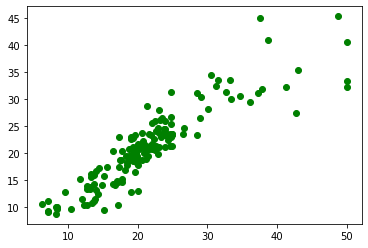

In [88]:
#Build model using n_neighbors of 3, as the best classifier
knn_1 = KNeighborsRegressor(n_neighbors=3)
scores = cross_val_score(knn_1, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
knn_1 = knn_1.fit(x_train, y_train)
y_pred5 = knn_1.predict(x_test)
df5 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred5})
df7 = df1.head(10)
df7
plt.scatter(y_test, y_pred5, c = 'green')

#KNN Accuracy: -29.74 (+/- 26.20)
#MSE GB: -30.90 (+/- 8.55)
#MSE SVR: -48.84 (+/- 28.13)
#MSE LR: -31.05 (+/- 37.10)

The models KNN and GradientBoostingRegressor show better performance with -29.74 (+/- 26.20) and -30.90 (+/- 8.55) MSE.
KNN model can be used to predict housing prices.